In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import circuit_drawer 
from qiskit.circuit.library import DraperQFTAdder,RGQFTMultiplier

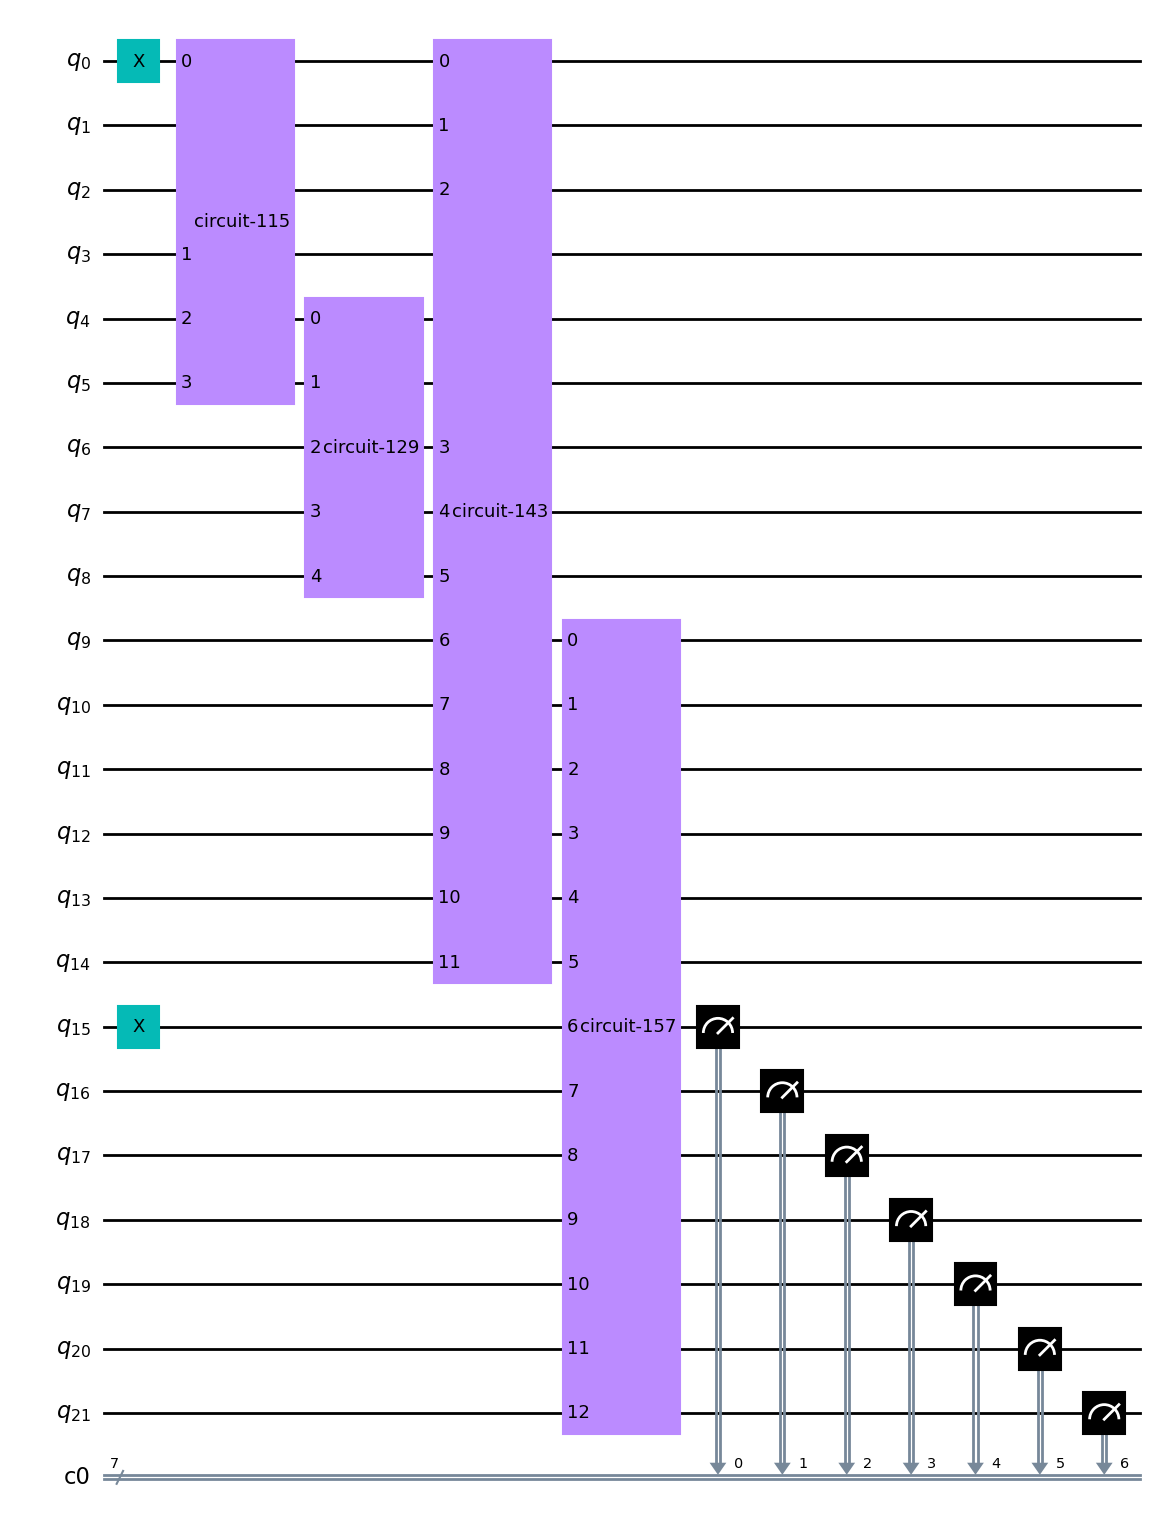

In [2]:
a0 = "1"  # Coefficient a0 du polynôme
a1 = "0"  # Coefficient a1 du polynôme
a2 = "0"  # Coefficient a2 du polynôme
x = "1"   # Valeur de x pour l'évaluation du polynôme
n = 1     # Nombre de bits pour représenter les coefficients

qr = QuantumRegister(15*n+7, 'q')  # Registre quantique avec la taille nécessaire
c = ClassicalRegister(4*n+3)       # Registre classique pour stocker les mesures
circ = QuantumCircuit(qr, c)       # Circuit quantique

# Initialisation des qubits en fonction des valeurs de x et des coefficients
for i in range(n):
    if x[i] == '1':
        circ.x(qr[i])  # Appliquer une porte X au qubit correspondant à x[i] si x[i] est '1'
    if a2[i] == '1':
        circ.x(qr[i+(2*n+1)])  # Appliquer une porte X au qubit correspondant à a2[i] si a2[i] est '1'
    if a1[i] == '1':
        circ.x(qr[i+(5*n+1)])  # Appliquer une porte X au qubit correspondant à a1[i] si a1[i] est '1'
    if a0[i] == '1':
        circ.x(qr[i+(n*11+4)])  # Appliquer une porte X au qubit correspondant à a0[i] si a0[i] est '1'

# Circuit de multiplication de X et a_2
qm = QuantumRegister(4*n, 'q')
circuit_mult = QuantumCircuit(qm)
tmp = RGQFTMultiplier(num_state_qubits=n, num_result_qubits=2*n, name="mult")
circuit_mult.compose(tmp, inplace=True,)  # Combinaison du circuit de multiplication avec le circuit principal
mult = circuit_mult.to_instruction()
circ.append(mult, [qr[0], qr[3], qr[4], qr[5]])

n = n*2  # Double la taille de n pour la sortie de la multiplication

# Circuit d'addition avec a_1
qa = QuantumRegister(2*n+1, 'q')
circuit_add = QuantumCircuit(qa)
tmp = DraperQFTAdder(num_state_qubits=1, kind="half", name="add")
circuit_add.compose(tmp, inplace=True)  # Combinaison du circuit d'addition avec le circuit principal
circ.append(circuit_add, [qr[4], qr[5], qr[6], qr[7], qr[8]])

n += 1  # Incrémente n de 1 pour l'addition

# Circuit de multiplication avec x
qm = QuantumRegister(4*n, 'q')
circuit_mult = QuantumCircuit(qm)
tmp = RGQFTMultiplier(num_state_qubits=n, num_result_qubits=2*n, name="mult")
circuit_mult.compose(tmp, inplace=True)  # Combinaison du circuit de multiplication avec le circuit principal
mult = circuit_mult.to_instruction()
circ.append(mult, [qr[0], qr[1], qr[2], qr[6], qr[7], qr[8], qr[9], qr[10], qr[11], qr[12], qr[13], qr[14]])

n *= 2  # Double la taille de n pour la sortie de la multiplication

# Circuit d'addition avec a0
qa = QuantumRegister(2*n+1, 'q')
circuit_add = QuantumCircuit(qa)
tmp = DraperQFTAdder(num_state_qubits=1, kind="half", name="add")
circuit_add.compose(tmp, inplace=True)  # Combinaison du circuit d'addition avec le circuit principal
circ.append(circuit_add, [qr[9], qr[10], qr[11], qr[12], qr[13], qr[14], qr[15], qr[16], qr[17], qr[18], qr[19], qr[20], qr[21]])

n = 1  # Réinitialise n à 1

# Mesure des qubits pertinents dans le registre quantique et stockage des résultats dans le registre classique
for i in range(4*n+3):
    circ.measure(qr[i+(n*11+4)], c[i])

# Dessine le circuit (en commentaire car cela nécessite une bibliothèque externe)
circuit_drawer(circ, output="mpl",filename="polynom.png")


In [3]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=100)
result = job.result()
counts = result.get_counts()

print(counts)

{'0000001': 100}
